## Preprocessing

In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


Step 1: Preprocess the Data

In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)

In [ ]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [ ]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
application_types_to_replace = list(application_df['APPLICATION_TYPE'].value_counts() [application_df['APPLICATION_TYPE'].value_counts() < 400].index)
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [ ]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
# application_df['CLASSIFICATION'].value_counts()
classification_value = application_df['CLASSIFICATION'].value_counts().loc[lambda x : x>1] 
classification_value

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
classifications_to_replace = list(application_df['CLASSIFICATION'].value_counts() [application_df['CLASSIFICATION'].value_counts() < 1700].index)
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
numeric_df = pd.get_dummies(application_df)
numeric_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = numeric_df["IS_SUCCESSFUL"]
X = numeric_df.drop(["IS_SUCCESSFUL"],axis=1)
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model


This is Attempt #1 

layer1 = 80 : activation function = relu 

layer2 = 30 : activation function = relu

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)


# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 5s 5ms/step - loss: 0.5724 - accuracy: 0.7200
Epoch 2/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5557 - accuracy: 0.7288
Epoch 3/100
804/804 [==============================] - 5s 6ms/step - loss: 0.5526 - accuracy: 0.7301
Epoch 4/100
804/804 [==============================] - 4s 6ms/step - loss: 0.5506 - accuracy: 0.7301
Epoch 5/100
804/804 [==============================] - 5s 7ms/step - loss: 0.5503 - accuracy: 0.7300
Epoch 6/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5482 - accuracy: 0.7335
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5486 - accuracy: 0.7322
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5473 - accuracy: 0.7324
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5466 - accuracy: 0.7337
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5460 - accura

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5584 - accuracy: 0.7283 - 448ms/epoch - 2ms/step
Loss: 0.5584161877632141, Accuracy: 0.7282798886299133


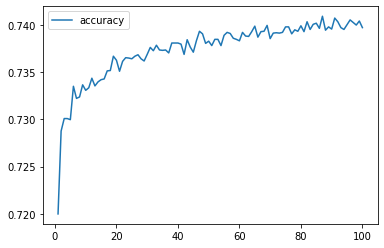

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")

In [29]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
nn.save("AlphabetSoupCharity_Optimization.h5")

RESULTS:

Attempt #1 

layer1 = 80 : activation function = relu 

layer2 = 30 : activation function = relu

loss: 0.5587 - accuracy: 0.7278

The accuracy percent shows that 72.8% of the model's predicted values align with the true values in the original dataset.

I wasn't able to reach the 75% accuracy with this model. I will try modifying the hidden layers and activation function next.



---



Attempt #2: Changing the hidden layers and activation function

layer1 = 100 : activation function = sigmoid

layer2 = 20 : activation function = sigmoid

In [ ]:
# # Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# #  YOUR CODE GOES HERE
# number_input_features = len(X_train_scaled[0])
# hidden_nodes_layer1 =  100
# hidden_nodes_layer2 = 20


# nn = tf.keras.models.Sequential()

# # First hidden layer
# #  YOUR CODE GOES HERE
# nn.add(
#     tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid")
# )


# # Second hidden layer
# #  YOUR CODE GOES HERE
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))
# # Output layer
# #  YOUR CODE GOES HERE
# nn.add(tf.keras.layers.Dense(units=1, activation="relu"))
# # Check the structure of the model
# nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               4400      
                                                                 
 dense_4 (Dense)             (None, 20)                2020      
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 6,441
Trainable params: 6,441
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# # Compile the model
# #  YOUR CODE GOES HERE
# nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# # Train the model
# #  YOUR CODE GOES HERE
# fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6022 - accuracy: 0.7034
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6086 - accuracy: 0.7148
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5864 - accuracy: 0.7141
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5685 - accuracy: 0.7243
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5666 - accuracy: 0.7241
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5644 - accuracy: 0.7262
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5645 - accuracy: 0.7266
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5679 - accuracy: 0.7247
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5587 - accuracy: 0.7269
Epoch 10/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5569 - accura

In [ ]:
# # Evaluate the model using the test data
# model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5657 - accuracy: 0.7278 - 467ms/epoch - 2ms/step
Loss: 0.56571364402771, Accuracy: 0.7278134226799011


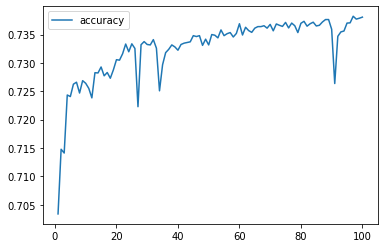

In [ ]:
# # Create a DataFrame containing training history
# history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# # Plot the accuracy
# history_df.plot(y="accuracy")

In [ ]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
# nn.save("AlphabetSoupCharity_Optimization.h5")

RESULTS:

Attempt #2: Changing the hidden layers and activation function

layer1 = 100 : activation function = sigmoid

layer2 = 20 : activation function = sigmoid

loss: 0.5585 - accuracy: 0.7293

The accuracy percent shows that 72.9% of the model's predicted values align with the true values in the original dataset.

I wasn't able to reach the 75% accuracy after modifying both the hidden layers and activation function. Next I will try adding a third layer to see if that will make a difference.



---



Attempt #3: Adding a third layer

layer1 = 80 : activation function = relu

layer2 = 30 : activation function = relu

layer3 = 10: activation function = relu

In [ ]:
# # Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# #  YOUR CODE GOES HERE
# number_input_features = len(X_train_scaled[0])
# hidden_nodes_layer1 =  80
# hidden_nodes_layer2 = 30
# hidden_nodes_layer3 = 10

# nn = tf.keras.models.Sequential()

# # First hidden layer
# #  YOUR CODE GOES HERE
# nn.add(
#     tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
# )


# # Second hidden layer
# #  YOUR CODE GOES HERE
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
# # Third hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
# # Output layer
# #  YOUR CODE GOES HERE
# nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# # Check the structure of the model
# nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                3520      
                                                                 
 dense_7 (Dense)             (None, 30)                2430      
                                                                 
 dense_8 (Dense)             (None, 10)                310       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 6,271
Trainable params: 6,271
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# # Compile the model
# #  YOUR CODE GOES HERE
# nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# # Train the model
# #  YOUR CODE GOES HERE
# fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5681 - accuracy: 0.7200
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5528 - accuracy: 0.7289
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5505 - accuracy: 0.7304
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5496 - accuracy: 0.7319
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5492 - accuracy: 0.7335
Epoch 6/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5476 - accuracy: 0.7336
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5471 - accuracy: 0.7336
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5463 - accuracy: 0.7336
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5460 - accuracy: 0.7328
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5461 - accura

In [ ]:
# # Evaluate the model using the test data
# model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5576 - accuracy: 0.7301 - 488ms/epoch - 2ms/step
Loss: 0.5576107501983643, Accuracy: 0.7301457524299622


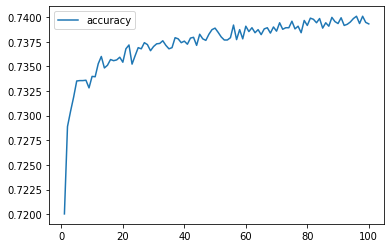

In [ ]:
# # Create a DataFrame containing training history
# history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# # Plot the accuracy
# history_df.plot(y="accuracy")

In [ ]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
# nn.save("AlphabetSoupCharity_Optimization.h5")

RESULTS:

Attempt #3

layer1 = 80 : activation function = relu

layer2 = 30 : activation function = relu

layer3 = 10 : activation function = relu

loss: 0.5592 - accuracy: 0.7280

The accuracy percent shows that 72.8% of the model's predicted values align with the true values in the original dataset.

After adding a third layer, I still wasn't able to reach the target accuracy of 75%.



---



**SUMMARY:**


 After making 3 different modifications, I still wasn't able to reach the target accuracy of 75%. Next time, I think using a different classification model might make a difference in predicting whether applicants will be successful or not if funded. 